<p> Yiwei Yu; 5708729817 </p>

In [1376]:
import pandas as pd
import numpy as np
import os
from sklearn.utils import resample
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegressionCV

<h1>1. Time Series Classification</h1>

<h5>b.Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,
2, and 3 in other folders as test data and other datasets as train data.</h5>

<h5>c.Feature Extraction.</h5>

<p><b>c.i</b> Research what types of time-domain features are usually used in time series
classification and list them (examples are minimum, maximum, mean, etc).</p>

<p> <b>Answer:</b>The time-domain features that are usually used in time series classification are: </p>
<p>minimum,maximum,mean,median,standard deviation, first and third quartile</p>

<p><b>c.ii</b>Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series
in each instance. </p>

In [1377]:
train_data = {'min1':[],'max1':[],'mean1':[],'median1':[],'std1':[],'first_q1':[],'third_q1':[],
              'min2':[],'max2':[],'mean2':[],'median2':[],'std2':[],'first_q2':[],'third_q2':[],
              'min3':[],'max3':[],'mean3':[],'median3':[],'std3':[],'first_q3':[],'third_q3':[],
              'min4':[],'max4':[],'mean4':[],'median4':[],'std4':[],'first_q4':[],'third_q4':[],
              'min5':[],'max5':[],'mean5':[],'median5':[],'std5':[],'first_q5':[],'third_q5':[],
              'min6':[],'max6':[],'mean6':[],'median6':[],'std6':[],'first_q6':[],'third_q6':[],
              'class':[]
             }

test_data = {'min1':[],'max1':[],'mean1':[],'median1':[],'std1':[],'first_q1':[],'third_q1':[],
              'min2':[],'max2':[],'mean2':[],'median2':[],'std2':[],'first_q2':[],'third_q2':[],
              'min3':[],'max3':[],'mean3':[],'median3':[],'std3':[],'first_q3':[],'third_q3':[],
              'min4':[],'max4':[],'mean4':[],'median4':[],'std4':[],'first_q4':[],'third_q4':[],
              'min5':[],'max5':[],'mean5':[],'median5':[],'std5':[],'first_q5':[],'third_q5':[],
              'min6':[],'max6':[],'mean6':[],'median6':[],'std6':[],'first_q6':[],'third_q6':[],
             'class':[]
             }

for i in ["standing","cycling","walking","sitting","lying"]:
    path = "../Data/AReM/" +i
    for ff in sorted(os.listdir(path),key = lambda x:int(x.split(".csv")[0].split("dataset")[1])):
        #print("../Data/AReM/"+i+'/'+ff)
        if(int(ff.split(".csv")[0].split("dataset")[1])<=3):
            data = pd.read_csv("../Data/AReM/"+i+'/'+ff,skiprows=4)
            test_data['class'].append(i)
            
            for num in range(1,7):
                test_data['min'+str(num)].append(data.iloc[:,num].describe().loc["min"])
                test_data['max'+str(num)].append(data.iloc[:,num].describe().loc["max"])
                test_data['mean'+str(num)].append(data.iloc[:,num].describe().loc["mean"])
                test_data['median'+str(num)].append(data.iloc[:,num].describe().loc["50%"])
                test_data['std'+str(num)].append(data.iloc[:,num].describe().loc["std"])
                test_data['first_q'+str(num)].append(data.iloc[:,num].describe().loc["25%"])
                test_data['third_q'+str(num)].append(data.iloc[:,num].describe().loc["75%"])
         
        else:
            train_data['class'].append(i)
            data = pd.read_csv("../Data/AReM/"+i+'/'+ff,skiprows=4)
            for num in range(1,7):
                train_data['min'+str(num)].append(data.iloc[:,num].describe().loc["min"])
                train_data['max'+str(num)].append(data.iloc[:,num].describe().loc["max"])
                train_data['mean'+str(num)].append(data.iloc[:,num].describe().loc["mean"])
                train_data['median'+str(num)].append(data.iloc[:,num].describe().loc["50%"])
                train_data['std'+str(num)].append(data.iloc[:,num].describe().loc["std"])
                train_data['first_q'+str(num)].append(data.iloc[:,num].describe().loc["25%"])
                train_data['third_q'+str(num)].append(data.iloc[:,num].describe().loc["75%"])

         
  
            
            
            
for i in ["bending1","bending2"]:
    path = "../Data/AReM/" +i
    for ff in sorted(os.listdir(path),key = lambda x:int(x.split(".csv")[0].split("dataset")[1])):
        #print("../Data/AReM/"+i+'/'+ff)
        if(int(ff.split(".csv")[0].split("dataset")[1])<=2):
            test_data['class'].append(i)
            data = pd.read_csv("../Data/AReM/"+i+'/'+ff,skiprows=4)
            for num in range(1,7):
                test_data['min'+str(num)].append(data.iloc[:,num].describe().loc["min"])
                test_data['max'+str(num)].append(data.iloc[:,num].describe().loc["max"])
                test_data['mean'+str(num)].append(data.iloc[:,num].describe().loc["mean"])
                test_data['median'+str(num)].append(data.iloc[:,num].describe().loc["50%"])
                test_data['std'+str(num)].append(data.iloc[:,num].describe().loc["std"])
                test_data['first_q'+str(num)].append(data.iloc[:,num].describe().loc["25%"])
                test_data['third_q'+str(num)].append(data.iloc[:,num].describe().loc["75%"])
        
        
     


        else:
            train_data['class'].append(i)
            if (int(ff.split(".csv")[0].split("dataset")[1])) == 4 and i == "bending2":    
                data = pd.read_csv("../Data/AReM/bending2/dataset4.csv",sep ='\s+',skiprows=5,names = ["Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"])
            else:
                data = pd.read_csv("../Data/AReM/"+i+'/'+ff,skiprows=4)
                
            for num in range(1,7):
                train_data['min'+str(num)].append(data.iloc[:,num].describe().loc["min"])
                train_data['max'+str(num)].append(data.iloc[:,num].describe().loc["max"])
                train_data['mean'+str(num)].append(data.iloc[:,num].describe().loc["mean"])
                train_data['median'+str(num)].append(data.iloc[:,num].describe().loc["50%"])
                train_data['std'+str(num)].append(data.iloc[:,num].describe().loc["std"])
                train_data['first_q'+str(num)].append(data.iloc[:,num].describe().loc["25%"])
                train_data['third_q'+str(num)].append(data.iloc[:,num].describe().loc["75%"])
           
        

train_data = pd.DataFrame(train_data)      
test_data = pd.DataFrame(test_data)
alldata = train_data.append(test_data,ignore_index=True)

In [1378]:
train_data

,min1,max1,mean1,median1,std1,first_q1,third_q1,min2,max2,mean2,...,first_q5,third_q5,min6,max6,mean6,median6,std6,first_q6,third_q6,class
0,30.00,46.67,42.648521,42.75,2.395338,41.5000,45.0000,0.0,2.95,0.402833,...,10.6275,14.2500,0.0,4.64,0.917354,0.83,0.709638,0.47,1.12,standing
1,36.00,47.50,43.720021,45.00,2.384105,43.0000,45.0000,0.0,1.92,0.366708,...,11.3100,15.5425,0.0,6.18,1.039688,0.83,0.916657,0.47,1.22,standing
2,34.50,47.75,44.471146,45.00,1.772553,45.0000,45.2500,0.0,2.18,0.290479,...,12.0000,14.8125,0.0,4.32,0.927375,0.83,0.756436,0.47,1.22,standing
3,35.50,48.00,46.224937,46.00,1.748315,45.2500,48.0000,0.0,4.50,0.312354,...,12.0000,15.2500,0.0,6.00,0.882583,0.83,0.668423,0.47,1.12,standing
4,29.75,48.00,46.932208,47.50,1.832665,47.2375,47.7500,0.0,4.60,0.429667,...,11.6700,15.5000,0.0,6.58,0.991125,0.83,0.855329,0.47,1.22,standing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.6700,0.0,1.50,0.413125,...,20.5000,23.7500,0.0,2.96,0.555313,0.49,0.487826,0.00,0.83,bending1
65,21.00,50.00,32.586208,33.00,6.238143,26.1875,34.5000,0.0,9.90,0.516125,...,17.6700,23.5000,0.0,13.61,1.162042,0.83,1.332980,0.47,1.30,bending2
66,27.50,33.00,29.881938,30.00,1.153837,29.0000,30.2700,0.0,1.00,0.256438,...,17.0000,19.0000,0.0,6.40,0.701625,0.71,0.481103,0.47,0.94,bending2
67,19.00,45.50,30.938104,29.00,7.684146,26.7500,38.0000,0.0,6.40,0.467167,...,15.0000,20.8125,0.0,6.73,1.107354,0.83,1.080842,0.47,1.30,bending2


In [1406]:
alldata

,min1,max1,mean1,median1,std1,first_q1,third_q1,min2,max2,mean2,...,third_q5,min6,max6,mean6,median6,std6,first_q6,third_q6,class,tag
0,30.00,46.67,42.648521,42.75,2.395338,41.5000,45.00,0.0,2.95,0.402833,...,14.2500,0.0,4.64,0.917354,0.83,0.709638,0.47,1.12,standing,0
1,36.00,47.50,43.720021,45.00,2.384105,43.0000,45.00,0.0,1.92,0.366708,...,15.5425,0.0,6.18,1.039688,0.83,0.916657,0.47,1.22,standing,0
2,34.50,47.75,44.471146,45.00,1.772553,45.0000,45.25,0.0,2.18,0.290479,...,14.8125,0.0,4.32,0.927375,0.83,0.756436,0.47,1.22,standing,0
3,35.50,48.00,46.224937,46.00,1.748315,45.2500,48.00,0.0,4.50,0.312354,...,15.2500,0.0,6.00,0.882583,0.83,0.668423,0.47,1.12,standing,0
4,29.75,48.00,46.932208,47.50,1.832665,47.2375,47.75,0.0,4.60,0.429667,...,15.5000,0.0,6.58,0.991125,0.83,0.855329,0.47,1.22,standing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,48.00,48.25,48.004167,48.00,0.032038,48.0000,48.00,0.0,0.43,0.007167,...,10.0000,0.0,2.50,0.641229,0.50,0.388372,0.46,0.83,lying,0
84,37.25,45.00,40.624792,40.50,1.476967,39.2500,42.00,0.0,1.30,0.358604,...,36.0000,0.0,1.92,0.570583,0.43,0.582915,0.00,1.30,bending1,1
85,38.00,45.67,42.812812,42.50,1.435550,42.0000,43.67,0.0,1.22,0.372438,...,34.5000,0.0,3.11,0.571083,0.43,0.601010,0.00,1.30,bending1,1
86,12.75,51.00,24.562958,24.25,3.737514,23.1875,26.50,0.0,6.87,0.590833,...,27.0000,0.0,4.97,0.700188,0.50,0.693720,0.43,0.87,bending2,1


<p><b>c.iii.</b>
Estimate the standard deviation of each of the time-domain features you
extracted from the data. Then, use Python’s bootstrapped or any other
method to build a 90% bootsrap confidence interval for the standard deviation
of each feature.</p>

In [1380]:
print("Standard Deviation:")
print("")
print("min1: " + str(alldata.min1.describe().loc["std"]))
print("max1: " + str(alldata.max1.describe().loc["std"]))
print("mean1: " + str(alldata.mean1.describe().loc["std"]))
print("median1: " + str(alldata.median1.describe().loc["std"]))
print("std1: " + str(alldata.std1.describe().loc["std"]))
print("first_q1: " + str(alldata.first_q1.describe().loc["std"]))
print("third_q1: " + str(alldata.third_q1.describe().loc["std"]))

print("")
print("min2: " + str(alldata.min2.describe().loc["std"]))
print("max2: " + str(alldata.max2.describe().loc["std"]))
print("mean2: " + str(alldata.mean2.describe().loc["std"]))
print("median2: " + str(alldata.median2.describe().loc["std"]))
print("std2: " + str(alldata.std2.describe().loc["std"]))
print("first_q2: " + str(alldata.first_q2.describe().loc["std"]))
print("third_q2: " + str(alldata.third_q2.describe().loc["std"]))

print("")
print("min3: " + str(alldata.min3.describe().loc["std"]))
print("max3: " + str(alldata.max3.describe().loc["std"]))
print("mean3: " + str(alldata.mean3.describe().loc["std"]))
print("median3: " + str(alldata.median3.describe().loc["std"]))
print("std3: " + str(alldata.std3.describe().loc["std"]))
print("first_q3: " + str(alldata.first_q3.describe().loc["std"]))
print("third_q3: " + str(alldata.third_q3.describe().loc["std"]))

print("")
print("min4: " + str(alldata.min4.describe().loc["std"]))
print("max4: " + str(alldata.max4.describe().loc["std"]))
print("mean4: " + str(alldata.mean4.describe().loc["std"]))
print("median4: " + str(alldata.median4.describe().loc["std"]))
print("std4: " + str(alldata.std4.describe().loc["std"]))
print("first_q4: " + str(alldata.first_q4.describe().loc["std"]))
print("third_q4: " + str(alldata.third_q4.describe().loc["std"]))

print("")
print("min5: " + str(alldata.min5.describe().loc["std"]))
print("max5: " + str(alldata.max5.describe().loc["std"]))
print("mean5: " + str(alldata.mean5.describe().loc["std"]))
print("median5: " + str(alldata.median5.describe().loc["std"]))
print("std5: " + str(alldata.std5.describe().loc["std"]))
print("first_q5: " + str(alldata.first_q5.describe().loc["std"]))
print("third_q5: " + str(alldata.third_q5.describe().loc["std"]))

print("")
print("min6: " + str(alldata.min6.describe().loc["std"]))
print("max6: " + str(alldata.max6.describe().loc["std"]))
print("mean6: " + str(alldata.mean6.describe().loc["std"]))
print("median6: " + str(alldata.median6.describe().loc["std"]))
print("std6: " + str(alldata.std6.describe().loc["std"]))
print("first_q6: " + str(alldata.first_q6.describe().loc["std"]))
print("third_q6: " + str(alldata.third_q6.describe().loc["std"]))

Standard Deviation:

min1: 9.56997528451281
max1: 4.39436168470319
mean1: 5.3357176583441746
median1: 5.440054137152636
std1: 1.772153397502841
first_q1: 6.153589724185372
third_q1: 5.138924613450999

min2: 0.0
max2: 5.06272937481064
mean2: 1.574163920074512
median2: 1.4122441649745636
std2: 0.8841054781862712
first_q2: 0.9463861911256932
third_q2: 2.1252664064059106

min3: 2.9564620592058177
max3: 4.875136693954745
mean3: 4.008380131777648
median3: 4.036396318784075
std3: 0.9467102620752954
first_q3: 4.22065788450763
third_q3: 4.171628224016797

min4: 0.0
max4: 2.1836254849723407
mean4: 1.1661140909196095
median4: 1.1455856609880553
std4: 0.45824169747631166
first_q4: 0.8436196840035465
third_q4: 1.5525041782503677

min5: 6.124001430553484
max5: 5.741238300951952
mean5: 5.675593204313178
median5: 5.813782436530036
std5: 1.024897905350688
first_q5: 6.09646520156495
third_q5: 5.531720219299494

min6: 0.0458381540164562
max6: 2.5189209776905526
mean6: 1.154811923954455
median6: 1.0864743

In [1381]:
ci = {'min1':[],'max1':[],'mean1':[],'median1':[],'std1':[],'first_q1':[],'third_q1':[],
              'min2':[],'max2':[],'mean2':[],'median2':[],'std2':[],'first_q2':[],'third_q2':[],
              'min3':[],'max3':[],'mean3':[],'median3':[],'std3':[],'first_q3':[],'third_q3':[],
              'min4':[],'max4':[],'mean4':[],'median4':[],'std4':[],'first_q4':[],'third_q4':[],
              'min5':[],'max5':[],'mean5':[],'median5':[],'std5':[],'first_q5':[],'third_q5':[],
              'min6':[],'max6':[],'mean6':[],'median6':[],'std6':[],'first_q6':[],'third_q6':[],
             }
parameters = ['min1','min2','min3','min4','min5','min6',
             'max1','max2','max3','max4','max5','max6',
              'mean1','mean2','mean3','mean4','mean5','mean6',
              'median1','median2','median3','median4','median5','median6',
              'std1','std2','std3','std4','std5','std6',
              'first_q1','first_q2','first_q3','first_q4','first_q5','first_q6',
              'third_q1','third_q2','third_q3','third_q4','third_q5','third_q6',
             ]

for i in range(1000):
    #min
    for p in parameters:
        sample1 = resample(np.array(train_data[p]),replace=True,n_samples=len(np.array(train_data[p])))
        std_sample = np.std(sample1)
        ci[p].append(float(std_sample))
        
print("90% Confidence Interval")
print("")
count = -1
for i in ci:
    print(i + str((np.percentile(ci[i],5),np.percentile(ci[i],95))))
    count += 1
    if count % 6 == 0 and count!= 0:
        print('----------------------------------------------')        

90% Confidence Interval

min1(7.517353715767741, 9.957342218979742)
max1(3.219879677454074, 5.288020203372574)
mean1(4.300834426387427, 5.373462310741932)
median1(4.304178327194135, 5.477445408404512)
std1(1.540732779723164, 1.9357883313090356)
first_q1(5.124152129481744, 6.167005648264807)
third_q1(3.894587256498889, 5.533490667324785)
----------------------------------------------
min2(0.0, 0.0)
max2(4.589842079135694, 5.487253922939855)
mean2(1.3956113321525383, 1.7318404493121713)
median2(1.2344303783788906, 1.5732641831711298)
std2(0.8086723091353951, 0.9600250531012269)
first_q2(0.822153283694986, 1.0367151416907339)
----------------------------------------------
third_q2(1.8900069095895031, 2.3194387049688907)
min3(2.790961113475491, 3.192916644526466)
max3(3.971811599175257, 5.37074343672367)
mean3(3.1823820998703902, 4.354742948742392)
median3(3.047766931496006, 4.395307201260584)
std3(0.7651830915046022, 1.1996127127351655)
----------------------------------------------
first

<h5><b>c.iv.</b>
Use your judgement to select the three most important time-domain features</h5>

In [1382]:
alldata['tag'] = 0
alldata.loc[alldata["class"] == "bending1","tag"] = 1
alldata.loc[alldata["class"] == "bending2","tag"] = 1
alldata

,min1,max1,mean1,median1,std1,first_q1,third_q1,min2,max2,mean2,...,third_q5,min6,max6,mean6,median6,std6,first_q6,third_q6,class,tag
0,30.00,46.67,42.648521,42.75,2.395338,41.5000,45.00,0.0,2.95,0.402833,...,14.2500,0.0,4.64,0.917354,0.83,0.709638,0.47,1.12,standing,0
1,36.00,47.50,43.720021,45.00,2.384105,43.0000,45.00,0.0,1.92,0.366708,...,15.5425,0.0,6.18,1.039688,0.83,0.916657,0.47,1.22,standing,0
2,34.50,47.75,44.471146,45.00,1.772553,45.0000,45.25,0.0,2.18,0.290479,...,14.8125,0.0,4.32,0.927375,0.83,0.756436,0.47,1.22,standing,0
3,35.50,48.00,46.224937,46.00,1.748315,45.2500,48.00,0.0,4.50,0.312354,...,15.2500,0.0,6.00,0.882583,0.83,0.668423,0.47,1.12,standing,0
4,29.75,48.00,46.932208,47.50,1.832665,47.2375,47.75,0.0,4.60,0.429667,...,15.5000,0.0,6.58,0.991125,0.83,0.855329,0.47,1.22,standing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,48.00,48.25,48.004167,48.00,0.032038,48.0000,48.00,0.0,0.43,0.007167,...,10.0000,0.0,2.50,0.641229,0.50,0.388372,0.46,0.83,lying,0
84,37.25,45.00,40.624792,40.50,1.476967,39.2500,42.00,0.0,1.30,0.358604,...,36.0000,0.0,1.92,0.570583,0.43,0.582915,0.00,1.30,bending1,1
85,38.00,45.67,42.812812,42.50,1.435550,42.0000,43.67,0.0,1.22,0.372438,...,34.5000,0.0,3.11,0.571083,0.43,0.601010,0.00,1.30,bending1,1
86,12.75,51.00,24.562958,24.25,3.737514,23.1875,26.50,0.0,6.87,0.590833,...,27.0000,0.0,4.97,0.700188,0.50,0.693720,0.43,0.87,bending2,1


In [1383]:
x = alldata[["min1","max1","mean1","median1","std1","first_q1","third_q1"]]
y = alldata["tag"]
model = LogisticRegression(solver='lbfgs',max_iter = 150)
rfe = RFE(model, n_features_to_select = 3)
selector = rfe.fit(x,y)
print(x.columns.values)
print(selector.support_)

['min1' 'max1' 'mean1' 'median1' 'std1' 'first_q1' 'third_q1']
[False  True  True False False False  True]


<p>Baed on the RFE, the three most import time-domain features are : <b>Max, Mean, third_quartile</b></p>

<h3>(d)Binary Classification using Logistic Regression</h3>

<p><b>d.i</b> Depictct scatter plots
of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other activities. </p>

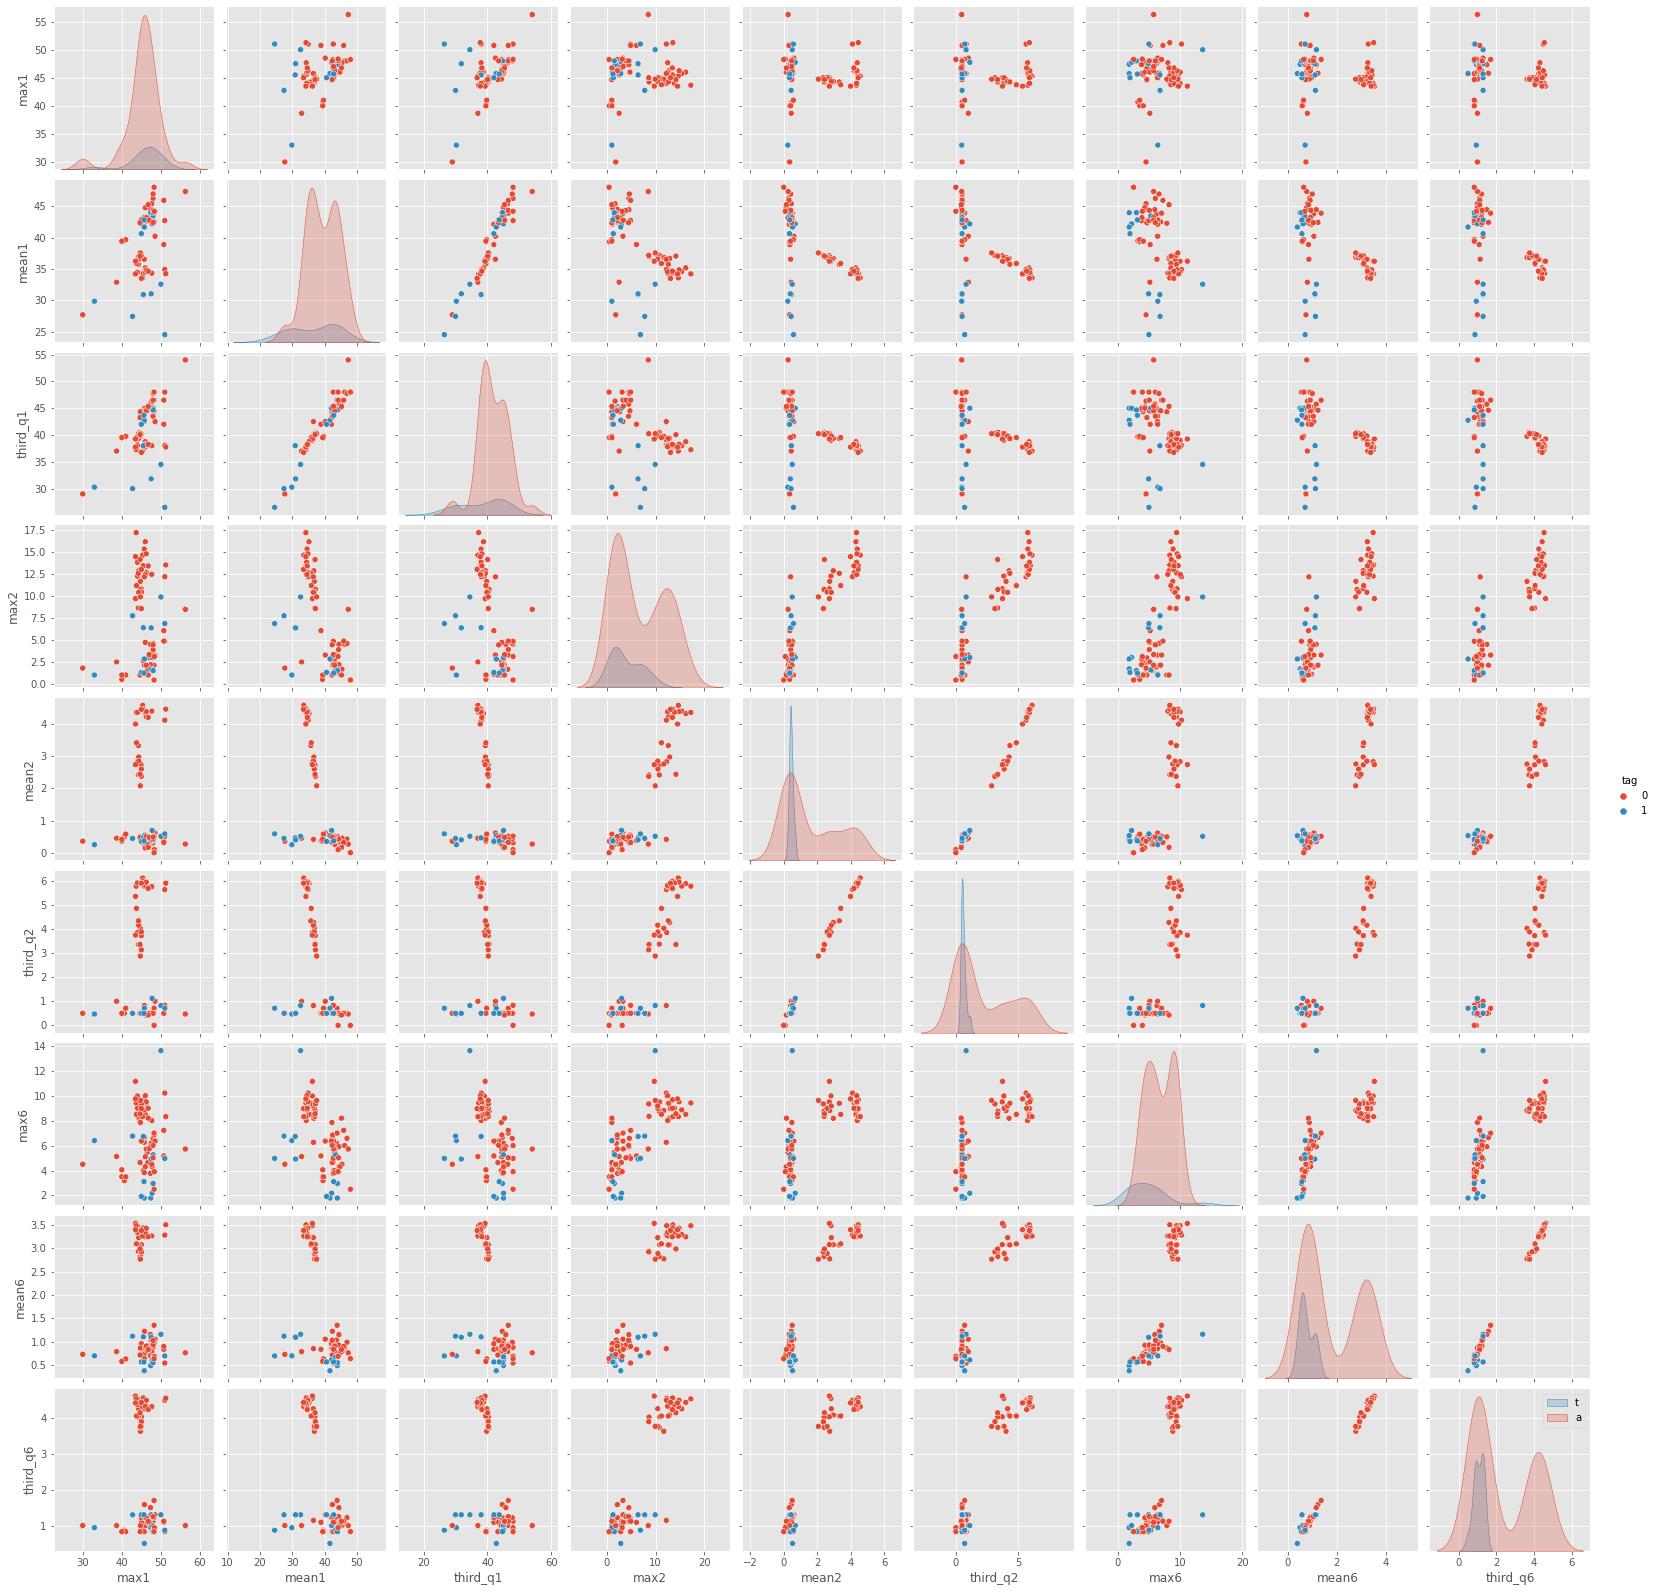

In [1384]:
selected_f = alldata[['max1','mean1','third_q1','max2','mean2','third_q2','max6','mean6','third_q6','tag']]
pairplot_fig = sns.pairplot(selected_f,hue = "tag")
plt.legend(labels = "tag")
plt.show()

<p><b>d.ii.</b>Break each time series in your training set into two (approximately) equallength time series.</p>

In [1385]:
#########split data

In [1386]:
def data_split(sp,path,flag,class1):
    final_data = {}
    if class1 == "bending1" or class1 == "bending2":
        final_data["tag"] = 1
    else:
        final_data["tag"] = 0
        
    final_data["class"] = class1

        
    if flag == 0:   
        data_b = pd.read_csv(path,skiprows=4)
    else:
        data_b = pd.read_csv(path,sep ='\s+',skiprows=5,names = ["Columns: time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"])
    if(data_b.shape[0]%sp == 0):
        part_size = data_b.shape[0]//sp
        total_part = data_b.shape[0] // part_size
        for i in range(0,total_part):
            chunck = data_b.iloc[i*part_size:i*part_size+part_size]
            final_data['mean'+str(6*i+1)] = chunck.avg_rss12.describe().loc["mean"]
            final_data['max'+str(6*i+1)] = chunck.avg_rss12.describe().loc["max"]
            final_data['third_q'+str(6*i+1)] = chunck.avg_rss12.describe().loc["75%"]
            
            final_data['mean'+str(6*i+2)] = chunck.var_rss12.describe().loc["mean"]
            final_data['max'+str(6*i+2)] = chunck.var_rss12.describe().loc["max"]
            final_data['third_q'+str(6*i+2)] = chunck.var_rss12.describe().loc["75%"]
            
            final_data['mean'+str(6*i+3)] = chunck.avg_rss13.describe().loc["mean"]
            final_data['max'+str(6*i+3)] = chunck.avg_rss13.describe().loc["max"]
            final_data['third_q'+str(6*i+3)] = chunck.avg_rss13.describe().loc["75%"]
            
            final_data['mean'+str(6*i+4)] = chunck.var_rss13.describe().loc["mean"]
            final_data['max'+str(6*i+4)] = chunck.var_rss13.describe().loc["max"]
            final_data['third_q'+str(6*i+4)] = chunck.var_rss13.describe().loc["75%"]
            
            final_data['mean'+str(6*i+5)] = chunck.avg_rss23.describe().loc["mean"]
            final_data['max'+str(6*i+5)] = chunck.avg_rss23.describe().loc["max"]
            final_data['third_q'+str(6*i+5)] = chunck.avg_rss23.describe().loc["75%"]
            
            final_data['mean'+str(6*i+6)] = chunck.var_rss23.describe().loc["mean"]
            final_data['max'+str(6*i+6)] = chunck.var_rss23.describe().loc["max"]
            final_data['third_q'+str(6*i+6)] = chunck.var_rss23.describe().loc["75%"]
            
            
    else:  
        part_size = int(np.ceil(data_b.shape[0]/sp))
        total_part = data_b.shape[0] // part_size
        for i in range(0,total_part):
            chunck = data_b.iloc[i*part_size:i*part_size+part_size]
            final_data['mean'+str(6*i+1)] = chunck.avg_rss12.describe().loc["mean"]
            final_data['max'+str(6*i+1)] = chunck.avg_rss12.describe().loc["max"]
            final_data['third_q'+str(6*i+1)] = chunck.avg_rss12.describe().loc["75%"]
            
            final_data['mean'+str(6*i+2)] = chunck.var_rss12.describe().loc["mean"]
            final_data['max'+str(6*i+2)] = chunck.var_rss12.describe().loc["max"]
            final_data['third_q'+str(6*i+2)] = chunck.var_rss12.describe().loc["75%"]
            
            final_data['mean'+str(6*i+3)] = chunck.avg_rss13.describe().loc["mean"]
            final_data['max'+str(6*i+3)] = chunck.avg_rss13.describe().loc["max"]
            final_data['third_q'+str(6*i+3)] = chunck.avg_rss13.describe().loc["75%"]
            
            final_data['mean'+str(6*i+4)] = chunck.var_rss13.describe().loc["mean"]
            final_data['max'+str(6*i+4)] = chunck.var_rss13.describe().loc["max"]
            final_data['third_q'+str(6*i+4)]= chunck.var_rss13.describe().loc["75%"]
            
            final_data['mean'+str(6*i+5)] = chunck.avg_rss23.describe().loc["mean"]
            final_data['max'+str(6*i+5)] = chunck.avg_rss23.describe().loc["max"]
            final_data['third_q'+str(6*i+5)] = chunck.avg_rss23.describe().loc["75%"]
            
            final_data['mean'+str(6*i+6)] = chunck.var_rss23.describe().loc["mean"]
            final_data['max'+str(6*i+6)] = chunck.var_rss23.describe().loc["max"]
            final_data['third_q'+str(6*i+6)] = chunck.var_rss23.describe().loc["75%"]


       ####
        chunck = data_b.iloc[total_part*part_size:]
        final_data['mean'+str(6*total_part+1)] = chunck.avg_rss12.describe().loc["mean"]
        final_data['max'+str(6*total_part+1)] = chunck.avg_rss12.describe().loc["max"]
        final_data['third_q'+str(6*total_part+1)] = chunck.avg_rss12.describe().loc["75%"]

        final_data['mean'+str(6*total_part+2)] = chunck.var_rss12.describe().loc["mean"]
        final_data['max'+str(6*total_part+2)] = chunck.var_rss12.describe().loc["max"]
        final_data['third_q'+str(6*total_part+2)] = chunck.var_rss12.describe().loc["75%"]

        final_data['mean'+str(6*total_part+3)] = chunck.avg_rss13.describe().loc["mean"]
        final_data['max'+str(6*total_part+3)] = chunck.avg_rss13.describe().loc["max"]
        final_data['third_q'+str(6*total_part+3)] = chunck.avg_rss13.describe().loc["75%"]

        final_data['mean'+str(6*total_part+4)] = chunck.var_rss13.describe().loc["mean"]
        final_data['max'+str(6*total_part+4)] = chunck.var_rss13.describe().loc["max"]
        final_data['third_q'+str(6*total_part+4)] = chunck.var_rss13.describe().loc["75%"]

        final_data['mean'+str(6*total_part+5)] = chunck.avg_rss23.describe().loc["mean"]
        final_data['max'+str(6*total_part+5)] = chunck.avg_rss23.describe().loc["max"]
        final_data['third_q'+str(6*total_part+5)] = chunck.avg_rss23.describe().loc["75%"]

        final_data['mean'+str(6*total_part+6)] = chunck.var_rss23.describe().loc["mean"]
        final_data['max'+str(6*total_part+6)] = chunck.var_rss23.describe().loc["max"]
        final_data['third_q'+str(6*total_part+6)] = chunck.var_rss23.describe().loc["75%"]
        
    return final_data
        


In [1387]:
def data_loading(n_pieces):
    train_seg = []
    test_seg = []


    for i in ["standing","cycling","walking","sitting","lying"]:
        path = "../Data/AReM/" +i
        for ff in sorted(os.listdir(path),key = lambda x:int(x.split(".csv")[0].split("dataset")[1])):
            #print("../Data/AReM/"+i+'/'+ff)
            if(int(ff.split(".csv")[0].split("dataset")[1])<=3):            
                test_seg.append(data_split(n_pieces,"../Data/AReM/"+i+'/'+ff,flag = 0,class1 = i))

            else:
                train_seg.append(data_split(n_pieces,"../Data/AReM/"+i+'/'+ff,flag = 0,class1 = i))


    for i in ["bending1","bending2"]:
        path = "../Data/AReM/" +i
        for ff in sorted(os.listdir(path),key = lambda x:int(x.split(".csv")[0].split("dataset")[1])):
            #print("../Data/AReM/"+i+'/'+ff)
            if(int(ff.split(".csv")[0].split("dataset")[1])<=2):
                 test_seg.append(data_split(n_pieces,"../Data/AReM/"+i+'/'+ff,flag = 0,class1 = i))
            else:
                if (int(ff.split(".csv")[0].split("dataset")[1])) == 4 and i == "bending2":    
                    train_seg.append(data_split(n_pieces,"../Data/AReM/"+i+'/'+ff,flag = 1,class1 = i))
                else:
                    train_seg.append(data_split(n_pieces,"../Data/AReM/"+i+'/'+ff,flag = 0,class1 = i))
    return pd.DataFrame(train_seg),pd.DataFrame(test_seg)


In [1388]:
#This might take up 10-15 minutes for loading all dataset(separated in different pieces)
all_sep_d = {}
for i in range(1,21):
    all_sep_d[i] = data_loading(i)

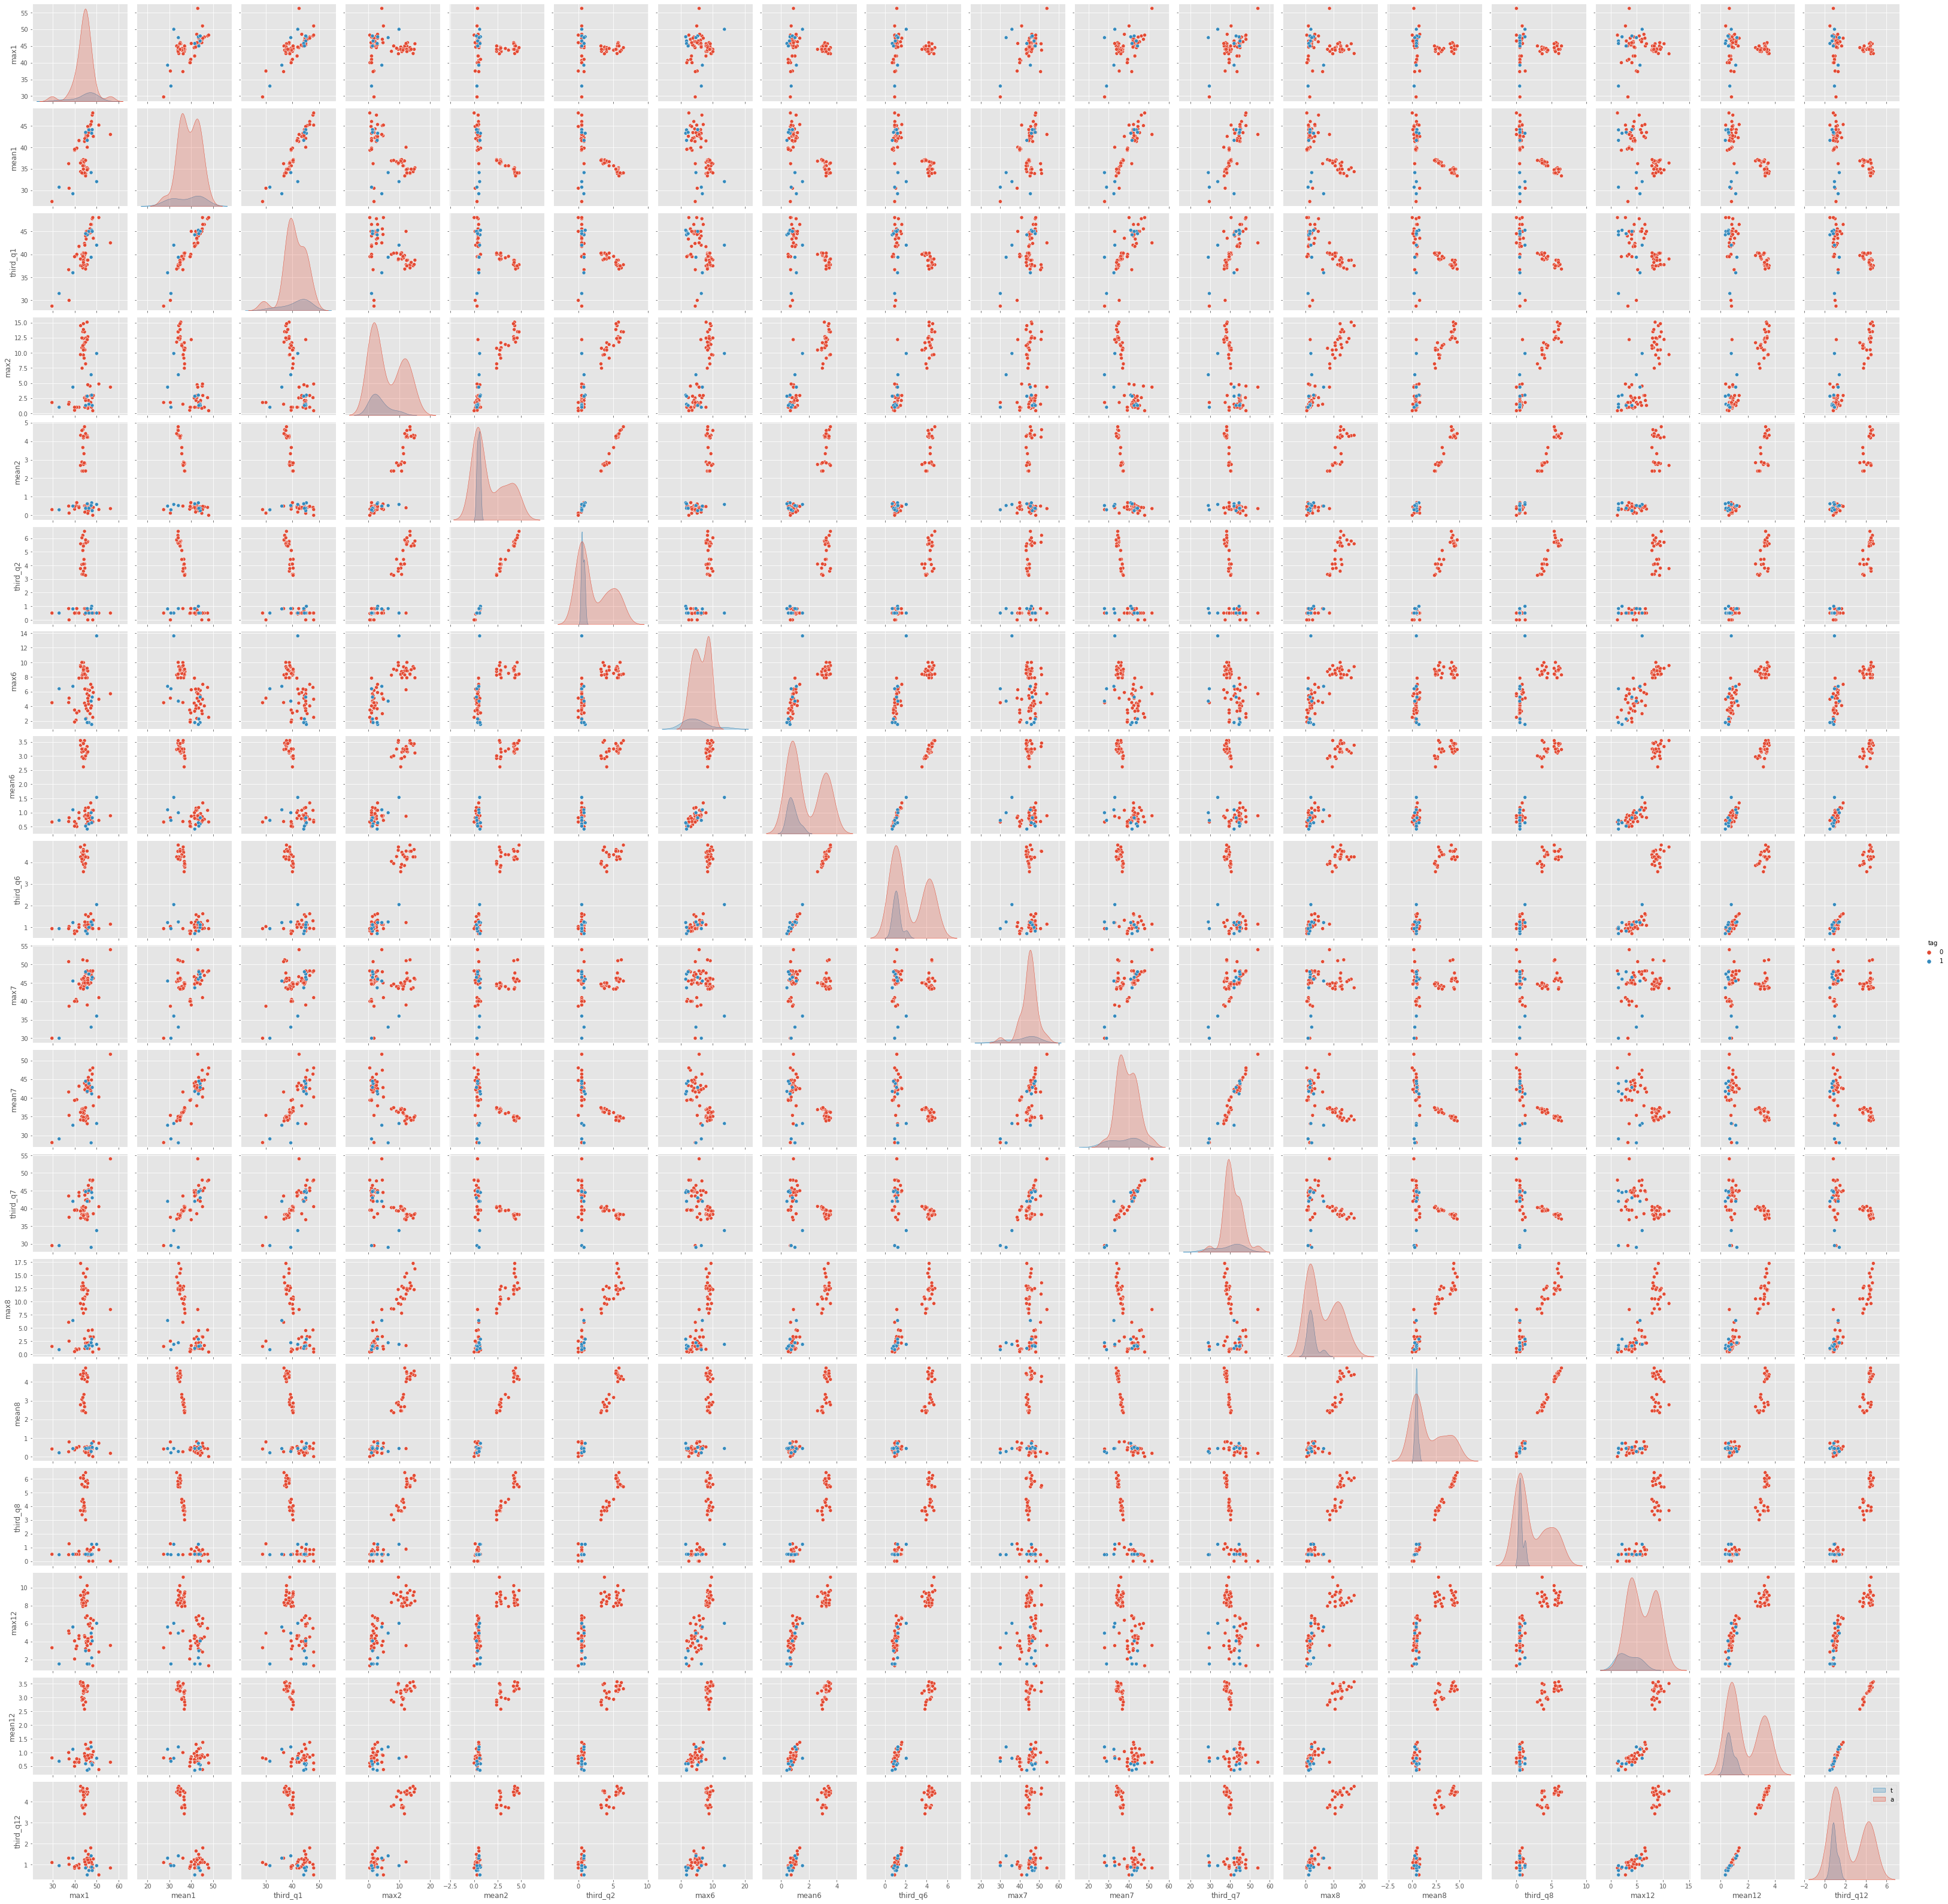

In [1389]:
part1,part2 = all_sep_d[2]
part1.append(part2,ignore_index=True)
selected_f2 = part1[['max1','mean1','third_q1','max2','mean2','third_q2','max6','mean6','third_q6','max7','mean7','third_q7','max8','mean8','third_q8','max12','mean12','third_q12','tag']]
pairplot_fig = sns.pairplot(selected_f2,hue = "tag")
plt.legend(labels = "tag")
plt.show()

<p> There are no considerable difference compared with the result in d(i), the overall shape of the plot looks like similar</p>

<p><b>d.iii</b>Break the time-series to solve binary classification problems</p>

In [1390]:
pair = []
for i in range(1,21):
    model = LogisticRegression(max_iter = 100,penalty = 'none')
    selector = RFECV(model, cv=StratifiedKFold(n_splits=5, random_state=55, shuffle=True),n_jobs = -1,scoring="accuracy")
    train_f,test_f = all_sep_d[i]

    X = train_f.iloc[:,2:]
    Y = train_f.iloc[:,0]
    selector = selector.fit(X, Y)
    print("l,p"+str((i,selector.n_features_))+": "+str(round(max(selector.grid_scores_),3)))
    #print(round(max(selector.grid_scores_),3))
    pair.append((i,selector.n_features_,round(max(selector.grid_scores_),3)))



l,p(1, 5): 1.0
l,p(2, 1): 0.971
l,p(3, 7): 0.986
l,p(4, 4): 0.986
l,p(5, 6): 0.986
l,p(6, 6): 0.971
l,p(7, 9): 0.986
l,p(8, 10): 0.971
l,p(9, 25): 0.986
l,p(10, 24): 0.97
l,p(11, 11): 0.971
l,p(12, 9): 0.971
l,p(13, 9): 0.971
l,p(14, 74): 0.971
l,p(15, 76): 0.986
l,p(16, 74): 0.986
l,p(17, 15): 0.971
l,p(18, 79): 0.971
l,p(19, 72): 0.986
l,p(20, 76): 0.97


<p>The (l,p) pair with the highest score is l == 1,p== 5 with score == 1.0</p>

In [1391]:
#selected model:
model = LogisticRegression(max_iter = 100,penalty = 'none')
selector = RFECV(model, cv=StratifiedKFold(n_splits=5, random_state=55, shuffle=True),n_jobs = -1,scoring="accuracy")
train_f,test_f = all_sep_d[1]

X = train_f.iloc[:,2:]
Y = train_f.iloc[:,0]
selector = selector.fit(X, Y)
print(selector.support_)
nnn = 0
feature_final = []

for i in selector.support_:
    if i:
        feature_final.append(X.columns[nnn])
    nnn+= 1
print(feature_final) 

[False False  True False False False False False  True False False False
  True  True False False  True False]
['third_q1', 'third_q3', 'mean5', 'max5', 'max6']


<p>iv.
Report the confusion matrix and show the ROC and AUC for your classifier
on train data. Report the parameters of your logistic regression as well
as the p-values associated with them.</p>

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28
                           Logit Regression Results                           
Dep. Variable:                    tag   No. Observations:                   69
Model:                          Logit   Df Residuals:                       63
Method:                           MLE   Df Model:                            5
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                   1.000
Time:                        23:40:31   Log-Likelihood:            -1.1180e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 2.738e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6433    2.6e+05  -2.4

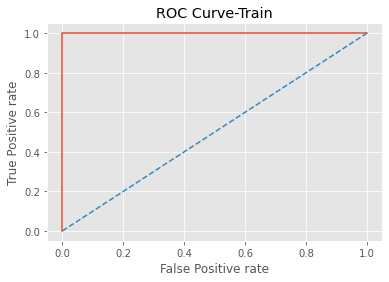

Accuracy: 1.0
confusion_matrix:
[[15  0]
 [ 0  4]]
AUC:1.0


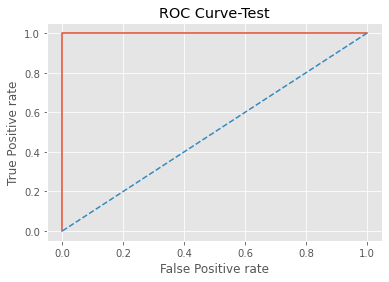

In [1392]:
xp = sm.add_constant(X[feature_final])
lr_model = sm.Logit(Y, xp)                     
result_lr = lr_model.fit(method = 'bfgs')
print(result_lr.summary())

model.fit(X[feature_final],Y)
predict_y = model.predict(X[feature_final])
print("confusion matrix:")
print(confusion_matrix(Y,predict_y))
false_p,true_p,th = metrics.roc_curve(Y,predict_y,pos_label = 1)

auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))
plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p )
plt.plot([0, 1], [0, 1],'--')

plt.show()

x_test = test_f.iloc[:,2:]
y_test = test_f.iloc[:,0]
print("Accuracy: " + str(model.score(x_test[feature_final],y_test)))
predict_y = model.predict(x_test[feature_final])
print("confusion_matrix:")
print(confusion_matrix(y_test,predict_y))
false_p,true_p,th = metrics.roc_curve(y_test,predict_y,pos_label = 1)

auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))
plt.title("ROC Curve-Test")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p)
plt.plot([0, 1], [0, 1],'--')
plt.show()



<p> The accuracy on the test set is as same as the cross-validation accuracy I obtained previously. Both 1.0</p>

<h5>d.vi.Do your classes seem to be well-separated to cause instability in calculating
logistic regression parameters?</h5>
<p><b>Answer:</b> Yes. My classes are well-separated based on the summary form statsmodel:</p>
<p>Complete Separation: The results show that there iscomplete separation.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified</p>

<h5>vii.
From the confusion matrices you obtained, do you see imbalanced classes?
If yes, build a logistic regression model based on case-control sampling and
adjust its parameters. Report the confusion matrix, ROC, and AUC of the
model</h5>
<p>Yes, there are imbalanced classes from the confusion matrices. The number of not bending class is 60, but the number of bending class is only 9. That is not a ideal ratio for a balanced class(1:5)</p>

In [1393]:
pair = []
for i in range(1,21):
    model = LogisticRegression(max_iter = 100,penalty = 'none')
    selector = RFECV(model, cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),n_jobs = -1,scoring="accuracy")
    train_f,test_f = all_sep_d[i]
    only_0 = train_f[train_f["tag"] == 0]
    under_sample = resample(only_0,replace=False,n_samples=27,random_state = 10)
    under_sample = under_sample.append(train_f[train_f["tag"] == 1],ignore_index = True)
    X = under_sample.iloc[:,2:]
    Y = under_sample.iloc[:,0]
    
    selector = selector.fit(X, Y)
    print("l,p"+str((i,selector.n_features_))+": "+str(round(max(selector.grid_scores_),3)))
    #print(round(max(selector.grid_scores_),3))
    pair.append((i,selector.n_features_,round(max(selector.grid_scores_),3)))

l,p(1, 4): 1.0
l,p(2, 1): 0.914
l,p(3, 5): 1.0
l,p(4, 4): 0.971
l,p(5, 4): 0.971
l,p(6, 3): 0.943
l,p(7, 6): 0.971
l,p(8, 9): 0.971
l,p(9, 11): 1.0
l,p(10, 19): 0.971
l,p(11, 33): 0.971
l,p(12, 33): 0.971
l,p(13, 41): 0.971
l,p(14, 13): 0.971
l,p(15, 13): 0.971
l,p(16, 15): 0.971
l,p(17, 21): 0.971
l,p(18, 6): 0.971
l,p(19, 14): 0.971
l,p(20, 28): 1.0


In [1394]:
#selected model:
model = LogisticRegression(max_iter = 100,penalty = 'none')
selector = RFECV(model, cv=StratifiedKFold(n_splits=5, random_state=50, shuffle=True),n_jobs = -1,scoring="accuracy")
train_f,test_f = all_sep_d[1]
only_0 = train_f[train_f["tag"] == 0]
under_sample = resample(only_0,replace=False,n_samples=27,random_state = 10)
under_sample = under_sample.append(train_f[train_f["tag"] == 1],ignore_index = True)
X = under_sample.iloc[:,2:]
Y = under_sample.iloc[:,0]
selector = selector.fit(X, Y)
print(selector.support_)
nnn = 0
feature_final = []

for i in selector.support_:
    if i:
        feature_final.append(X.columns[nnn])
    nnn+= 1
print(feature_final)

[False False  True False False False False False False False False False
  True  True False False  True False]
['third_q1', 'mean5', 'max5', 'max6']


confusion matrix:
[[27  0]
 [ 0  9]]
AUC:1.0


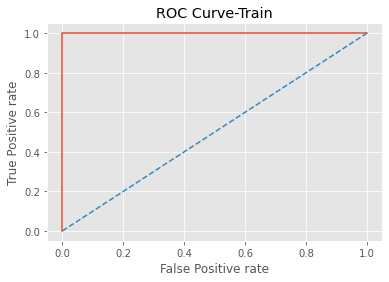

Accuracy: 1.0
confusion_matrix:
[[15  0]
 [ 0  4]]
AUC:1.0


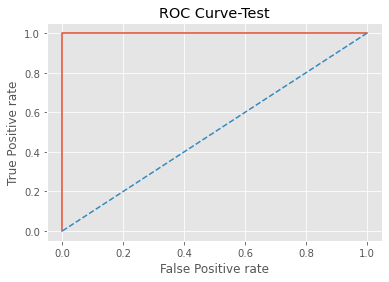

In [1395]:
model.fit(X[feature_final],Y)
predict_y = model.predict(X[feature_final])
print("confusion matrix:")
print(confusion_matrix(Y,predict_y))
false_p,true_p,th = metrics.roc_curve(Y,predict_y,pos_label = 1)

auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))
plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p )
plt.plot([0, 1], [0, 1],'--')

plt.show()

x_test = test_f.iloc[:,2:]
y_test = test_f.iloc[:,0]
print("Accuracy: " + str(model.score(x_test[feature_final],y_test)))
predict_y = model.predict(x_test[feature_final])
print("confusion_matrix:")
print(confusion_matrix(y_test,predict_y))
false_p,true_p,th = metrics.roc_curve(y_test,predict_y,pos_label = 1)

auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))
plt.title("ROC Curve-Test")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p)
plt.plot([0, 1], [0, 1],'--')
plt.show()




<h3> Part.(e)
Binary Classification Using L1-penalized logistic regression</h3>

In [1396]:
print("l"+"    C","     mean_score")
for i in range(1,21):
    model = LogisticRegressionCV(max_iter = 100,penalty = 'l1',solver = 'liblinear',cv=StratifiedKFold(n_splits=5, random_state=55, shuffle=True))
    train_f,test_f = all_sep_d[i]

    X = train_f.iloc[:,2:]
    Y = train_f.iloc[:,0]
    aftermodel = model.fit(X,Y)
    c_list = aftermodel.Cs_
    best_c = aftermodel.C_
    c_ind = np.where(c_list == best_c)[0][0]
    score_list = aftermodel.scores_
    mean_cv_score = np.mean(aftermodel.scores_[1][:,c_ind])
    print((i,round(best_c[0],3),round(mean_cv_score,3)))

l    C      mean_score
(1, 2.783, 1.0)
(2, 0.359, 0.956)
(3, 0.359, 0.97)
(4, 21.544, 0.971)
(5, 21.544, 0.971)
(6, 2.783, 0.957)
(7, 0.046, 0.942)
(8, 0.359, 0.956)
(9, 0.359, 0.956)
(10, 0.046, 0.942)
(11, 2.783, 0.957)
(12, 0.046, 0.956)
(13, 0.046, 0.956)
(14, 0.046, 0.956)
(15, 21.544, 0.956)
(16, 21.544, 0.956)
(17, 0.046, 0.942)
(18, 0.046, 0.956)
(19, 0.046, 0.956)
(20, 0.046, 0.956)


confusion_matrix:training
[[60  0]
 [ 0  9]]
AUC:1.0


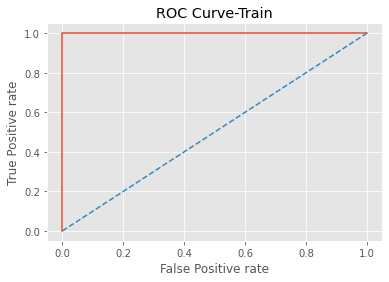


confusion_matrix:testing
[[15  0]
 [ 0  4]]
AUC:1.0


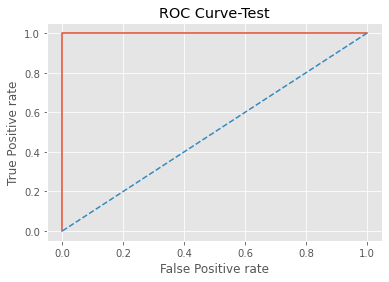

In [1397]:
#selected model
model = LogisticRegression(max_iter = 100,C =21.544, penalty = 'l1',solver = 'liblinear')
train_f,test_f = all_sep_d[1]

X = train_f.iloc[:,2:]
Y = train_f.iloc[:,0]
model.fit(X,Y)
predict_y = model.predict(X)
print("confusion_matrix:training")
print(confusion_matrix(Y,predict_y))

false_p,true_p,th = metrics.roc_curve(Y,predict_y,pos_label = 1)

auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))
plt.title("ROC Curve-Train")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p )
plt.plot([0, 1], [0, 1],'--')

plt.show()


x_test = test_f.iloc[:,2:]
y_test = test_f.iloc[:,0]

predict_y = model.predict(x_test)
print("")
print("confusion_matrix:testing")
print(confusion_matrix(y_test,predict_y))




predict_y = model.predict(x_test)
false_p,true_p,th = metrics.roc_curve(y_test,predict_y,pos_label = 1)

auc = metrics.auc(false_p, true_p)
print("AUC:"+str(auc))
plt.title("ROC Curve-Test")
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot(false_p,true_p)
plt.plot([0, 1], [0, 1],'--')
plt.show()

<p><b>ii.</b>Compare the L1-penalized with variable selection using p-values. Which one
performs better? Which one is easier to implement?</p>
<p>The cv score for L1-penalized is slightly lower, but it's test accuracy is as good as the previous one. Both 1.0. The L1-penalized one is more easy to implement because we don't have to do the p-value calculation for each single variable</p>

<h3>(f)Multi-class Classification (The Realistic Case)</h3>

In [1398]:
from warnings import filterwarnings
filterwarnings('ignore')


In [1407]:
pair = []
for i in range(1,21):
        #model = LogisticRegressionCV(max_iter = 100,penalty = 'l1',solver = 'liblinear',cv=StratifiedKFold(n_splits=5, random_state=55, shuffle=True))
    model = LogisticRegressionCV(max_iter =300,penalty = 'l1',solver = 'saga',multi_class = 'multinomial',cv = StratifiedKFold(n_splits=5, random_state=55, shuffle=True))
    
    train_f,test_f = all_sep_d[i]
    train_f.loc[train_f["class"] == "bending2","class"] = "bending"
    train_f.loc[train_f["class"] == "bending1","class"] = "bending"


    X = train_f.iloc[:,2:]
    Y = train_f.iloc[:,1]
    model.fit(X, Y)
                                 
    X_t = test_f.iloc[:,2:]
    Y_t = test_f.iloc[:,1]
    print("l"+str(i)+": " + "test_error:" + str(round(model.score(X_t,Y_t),3)))



l1: test_error:0.947
l2: test_error:0.737
l3: test_error:0.632
l4: test_error:0.737
l5: test_error:0.737
l6: test_error:0.684
l7: test_error:0.737
l8: test_error:0.684
l9: test_error:0.737
l10: test_error:0.737
l11: test_error:0.684
l12: test_error:0.684
l13: test_error:0.737
l14: test_error:0.684
l15: test_error:0.632
l16: test_error:0.684
l17: test_error:0.684
l18: test_error:0.684
l19: test_error:0.684
l20: test_error:0.684


Accuracy on Test Data:0.9473684210526315
Confusion Matrix on Test Data:
[[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 1 0 2 0]
 [0 0 0 0 0 3]]


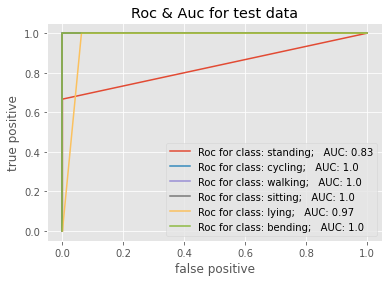

In [1408]:
model = LogisticRegression(max_iter =2200,penalty = 'l1',solver = 'saga',multi_class = 'multinomial')
train_f,test_f = all_sep_d[1]

train_f.loc[train_f["class"] == "bending2","class"] = "bending"
train_f.loc[train_f["class"] == "bending1","class"] = "bending"


test_f.loc[test_f["class"] == "bending2","class"] = "bending"
test_f.loc[test_f["class"] == "bending1","class"] = "bending"

X = train_f.iloc[:,2:]
Y = train_f.iloc[:,1]
model.fit(X,Y)

X_t = test_f.iloc[:,2:]
Y_t = test_f.iloc[:,1]

testscore = model.score(X_t,Y_t)
print("Accuracy on Test Data:" + str(testscore))

predict_y = model.predict(X_t)
print("Confusion Matrix on Test Data:")
print(confusion_matrix(Y_t,predict_y))


all_cate = ["standing","cycling","walking","sitting","lying","bending"]
b_y = label_binarize(Y_t, classes=["standing","cycling","walking","sitting","lying","bending"])
b_y.shape[1]

b_predict = label_binarize(predict_y, classes=["standing","cycling","walking","sitting","lying","bending"])

fp = {}
tp = {}
auc_s = {}
for i in range(b_y.shape[1]):
    fp[i], tp[i], th = roc_curve(b_y[:, i], b_predict[:, i])
    auc_s[i] = metrics.auc(fp[i], tp[i])
for i in range(b_y.shape[1]):
    plt.plot(fp[i], tp[i],label='Roc for class: ' + all_cate[i] + ';   AUC: '+str(round(auc_s[i],2)))

plt.title('Roc & Auc for test data')
plt.legend()
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.show()

<h5>ii.
Repeat 1(f)i using a Na ̈ıve Bayes’ classifier. Use both Gaussian and Multi-
nomial priors and compare the results.</h5>

In [1401]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [1402]:
pair = []
for i in range(1,21):
        #model = LogisticRegressionCV(max_iter = 100,penalty = 'l1',solver = 'liblinear',cv=StratifiedKFold(n_splits=5, random_state=55, shuffle=True))
    model = GaussianNB()
    
    train_f,test_f = all_sep_d[i]
    train_f.loc[train_f["class"] == "bending2","class"] = "bending"
    train_f.loc[train_f["class"] == "bending1","class"] = "bending"


    X = train_f.iloc[:,2:]
    Y = train_f.iloc[:,1]
    model.fit(X, Y)
                                 
    X_t = test_f.iloc[:,2:]
    Y_t = test_f.iloc[:,1]
    print("l"+str(i)+": " + "test_error:" + str(round(model.score(X_t,Y_t),3)))



l1: test_error:1.0
l2: test_error:0.737
l3: test_error:0.684
l4: test_error:0.684
l5: test_error:0.684
l6: test_error:0.632
l7: test_error:0.684
l8: test_error:0.684
l9: test_error:0.684
l10: test_error:0.684
l11: test_error:0.684
l12: test_error:0.684
l13: test_error:0.684
l14: test_error:0.684
l15: test_error:0.684
l16: test_error:0.684
l17: test_error:0.684
l18: test_error:0.684
l19: test_error:0.684
l20: test_error:0.684


Accuracy on Test Data:1.0
Confusion Matrix on Test Data:
[[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]


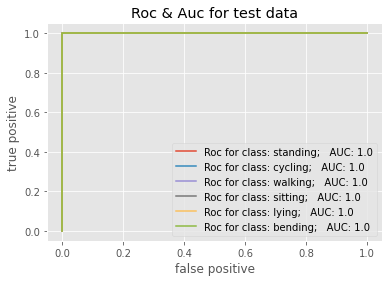

In [1403]:
model = GaussianNB()
train_f,test_f = all_sep_d[1]

train_f.loc[train_f["class"] == "bending2","class"] = "bending"
train_f.loc[train_f["class"] == "bending1","class"] = "bending"


test_f.loc[test_f["class"] == "bending2","class"] = "bending"
test_f.loc[test_f["class"] == "bending1","class"] = "bending"

X = train_f.iloc[:,2:]
Y = train_f.iloc[:,1]
model.fit(X,Y)

X_t = test_f.iloc[:,2:]
Y_t = test_f.iloc[:,1]

testscore = model.score(X_t,Y_t)
print("Accuracy on Test Data:" + str(testscore))

predict_y = model.predict(X_t)
print("Confusion Matrix on Test Data:")
print(confusion_matrix(Y_t,predict_y))


all_cate = ["standing","cycling","walking","sitting","lying","bending"]
b_y = label_binarize(Y_t, classes=["standing","cycling","walking","sitting","lying","bending"])
b_y.shape[1]

b_predict = label_binarize(predict_y, classes=["standing","cycling","walking","sitting","lying","bending"])

fp = {}
tp = {}
auc_s = {}
for i in range(b_y.shape[1]):
    fp[i], tp[i], th = roc_curve(b_y[:, i], b_predict[:, i])
    auc_s[i] = metrics.auc(fp[i], tp[i])
for i in range(b_y.shape[1]):
    plt.plot(fp[i], tp[i],label='Roc for class: ' + all_cate[i] + ';   AUC: '+str(round(auc_s[i],2)))

plt.title('Roc & Auc for test data')
plt.legend()
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.show()

In [1404]:
pair = []
for i in range(1,21):
        #model = LogisticRegressionCV(max_iter = 100,penalty = 'l1',solver = 'liblinear',cv=StratifiedKFold(n_splits=5, random_state=55, shuffle=True))
    model = MultinomialNB()
    
    train_f,test_f = all_sep_d[i]
    train_f.loc[train_f["class"] == "bending2","class"] = "bending"
    train_f.loc[train_f["class"] == "bending1","class"] = "bending"


    X = train_f.iloc[:,2:]
    Y = train_f.iloc[:,1]
    model.fit(X, Y)
                                 
    X_t = test_f.iloc[:,2:]
    Y_t = test_f.iloc[:,1]
    print("l"+str(i)+": " + "test_error:" + str(round(model.score(X_t,Y_t),3)))

l1: test_error:0.947
l2: test_error:0.684
l3: test_error:0.684
l4: test_error:0.737
l5: test_error:0.737
l6: test_error:0.737
l7: test_error:0.737
l8: test_error:0.737
l9: test_error:0.737
l10: test_error:0.737
l11: test_error:0.737
l12: test_error:0.737
l13: test_error:0.737
l14: test_error:0.737
l15: test_error:0.737
l16: test_error:0.737
l17: test_error:0.737
l18: test_error:0.737
l19: test_error:0.684
l20: test_error:0.737


Accuracy on Test Data:0.9473684210526315
Confusion Matrix on Test Data:
[[4 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 2 1 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 3]]


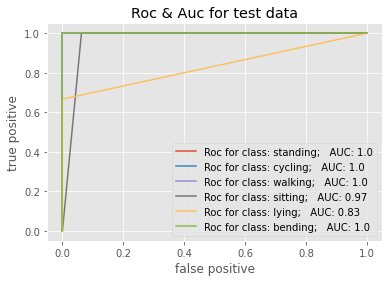

In [1405]:
model = MultinomialNB()
train_f,test_f = all_sep_d[1]

train_f.loc[train_f["class"] == "bending2","class"] = "bending"
train_f.loc[train_f["class"] == "bending1","class"] = "bending"


test_f.loc[test_f["class"] == "bending2","class"] = "bending"
test_f.loc[test_f["class"] == "bending1","class"] = "bending"

X = train_f.iloc[:,2:]
Y = train_f.iloc[:,1]
model.fit(X,Y)

X_t = test_f.iloc[:,2:]
Y_t = test_f.iloc[:,1]

testscore = model.score(X_t,Y_t)
print("Accuracy on Test Data:" + str(testscore))

predict_y = model.predict(X_t)
print("Confusion Matrix on Test Data:")
print(confusion_matrix(Y_t,predict_y))


all_cate = ["standing","cycling","walking","sitting","lying","bending"]
b_y = label_binarize(Y_t, classes=["standing","cycling","walking","sitting","lying","bending"])
b_y.shape[1]

b_predict = label_binarize(predict_y, classes=["standing","cycling","walking","sitting","lying","bending"])

fp = {}
tp = {}
auc_s = {}
for i in range(b_y.shape[1]):
    fp[i], tp[i], th = roc_curve(b_y[:, i], b_predict[:, i])
    auc_s[i] = metrics.auc(fp[i], tp[i])
for i in range(b_y.shape[1]):
    plt.plot(fp[i], tp[i],label='Roc for class: ' + all_cate[i] + ';   AUC: '+str(round(auc_s[i],2)))

plt.title('Roc & Auc for test data')
plt.legend()
plt.xlabel('false positive')
plt.ylabel('true positive')
plt.show()

<h3>iii.Which method is better for multi-class classification in this problem?</h3>
<p> For this multi-class problem,the GaussianNB classifier performs better on the test data. </p>

<h1>2.ISLR 3.7.4</h1>

<p>a.There is no exact answer without providing more detailed information, however;  given the relationship between X and Y is linear, the linear regression is more likely to have a small RSS and fit the relationship better. </p>

<p>b. The RSS for the linear regression is smaller compared with the cubic regression cause the cubic regression is more likely to overfit. </p>

<p>c.Given the relationship between X and Y is not linear, the cubic regression is tends to have a smaller training RSS because the cubic regression is more flexible on solving nonlinear relationship.</p> 

<p>d.There is no exact answer without providing more detailed information, and the answers really depends on how linear/nonlinear  the relationship between x and y is.</p>

<h1>3.ISLR, 4.8.3, 4.ISLR 4.8.7</h1>

![](hw552.jpeg)